## Target 1

In [1]:
DATA = load("-ascii", "data/Target1.txt");
[n, _] = size(DATA)
d = 4; % dim(state variable)
t0 = 0;
x = zeros(d, 1);
P = 100 * eye(d);
Q = zeros(d, d); % constant velocity is assumed
H = [eye(2) zeros(2, 2)]; % just a projection to remove the velocities
Nv = zeros(n, d/2);

function [x_next P_next] = motion(x, P, dt, Q)
  [d, _] = size(x);
  F = [eye(d/2) (eye(d/2) * dt); zeros(d/2, d/2) eye(d/2)];
  x_next = F*x;
  P_next = F*P*F'+Q;
endfunction

function [x_new P_new nv S] = fuse(x, P, z, R, H)
  S = H * P * H' + R;
  W = P * H' * inv(S);
  nv = z - H * x;
  x_new = x + W * nv;
  P_new = P - W * S * W';
endfunction

for idx=1:n
  % observation
  t = DATA(idx, 1);
  z = DATA(idx, 2:3)';
  M = [DATA(idx, 4) DATA(idx, 5); DATA(idx, 5) DATA(idx, 6)];
  R = M*M;
  % forward prediction using motion model
  [x_next P_next] = motion(x, P, t-t0, Q);
  t0 = t;
  % fused estimate
  [x P nv S] = fuse(x_next, P_next, z, R, H);
  Nv(idx, :) = nv ./ sqrt(diag(S));
endfor

n =  1200
_ =  6


### Final estimate

In [2]:
disp('state variables & standard deviations:');
printf("\tx = %f +/- %f\n", x(1), sqrt(P(1,1)));
printf("\ty = %f +/- %f\n", x(2), sqrt(P(2,2)));
printf("\tvx = %f +/- %.10f\n", x(3), sqrt(P(3,3)));
printf("\tvy = %f +/- %.10f\n", x(4), sqrt(P(4,4)));
disp('mean:'), disp(x)
disp('covariance:'), disp(P)

state variables & standard deviations:
	x = 497.151056 +/- 0.001344
	y = 1050.181365 +/- 0.002409
	vx = 0.279999 +/- 0.0000022012
	vy = 0.599999 +/- 0.0000024667
mean:
    497.15106
   1050.18136
      0.28000
      0.60000
covariance:
   1.8058e-06   2.3939e-06   2.8694e-09   2.7689e-09
   2.3939e-06   5.8050e-06   3.8279e-09   5.5033e-09
   2.8698e-09   3.8279e-09   4.8452e-12   4.6079e-12
   2.7689e-09   5.5038e-09   4.6079e-12   6.0847e-12


### 1hrs later

In [3]:
[x_1h, P_1h] = motion(x, P, 3600, Q);
disp('state variables & standard deviations:');
printf("\tx = %f +/- %f\n", x_1h(1), sqrt(P_1h(1,1)));
printf("\ty = %f +/- %f\n", x_1h(2), sqrt(P_1h(2,2)));
printf("\tvx = %f +/- %.10f\n", x_1h(3), sqrt(P_1h(3,3)));
printf("\tvy = %f +/- %.10f\n", x_1h(4), sqrt(P_1h(4,4)));
disp('mean:'), disp(x_1h)
disp('covariance:'), disp(P_1h)

state variables & standard deviations:
	x = 1505.147348 +/- 0.009234
	y = 3210.178732 +/- 0.011148
	vx = 0.279999 +/- 0.0000022012
	vy = 0.599999 +/- 0.0000024667
mean:
   1505.14735
   3210.17873
      0.28000
      0.60000
covariance:
   8.5260e-05   8.5861e-05   2.0312e-08   1.9357e-08
   8.5861e-05   1.2429e-04   2.0416e-08   2.7408e-08
   2.0312e-08   2.0416e-08   4.8452e-12   4.6079e-12
   1.9357e-08   2.7409e-08   4.6079e-12   6.0847e-12


### Innovations

mean:
-0.015638
variance:
 0.96976


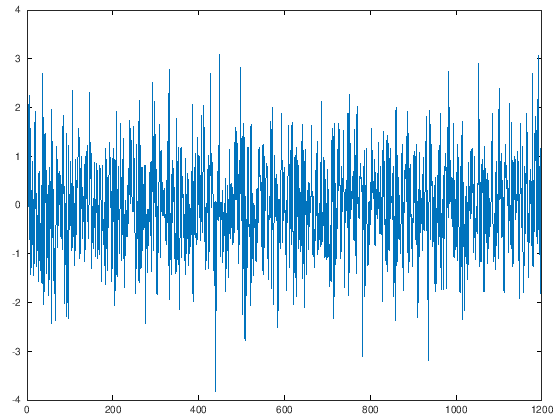

In [4]:
# x innovations
plot(2:idx-1, Nv(2:idx-1, 1))
disp('mean:'), disp(mean(Nv(:,1)));
disp('variance:'), disp(cov(Nv(:,1)));

mean:
-0.0067019
variance:
 0.98268


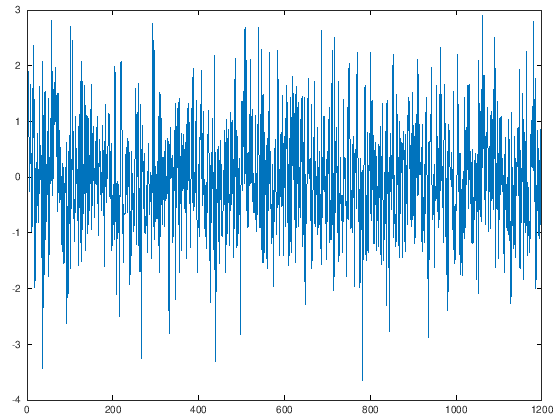

In [5]:
# y innovations
plot(2:idx-1, Nv(2:idx-1, 2))
disp('mean:'), disp(mean(Nv(:,2)));
disp('variance:'), disp(cov(Nv(:,2)));

## Target 2

In [6]:
DATA = load("-ascii", "data/Target2.txt");
[n, _] = size(DATA)
d = 4; % dim(state variable)
t0 = 0;
x = zeros(d, 1);
P = 100 * eye(d);
Q = zeros(d, d); % constant velocity is assumed
H = [eye(2) zeros(2, 2)]; % just a projection to remove the velocities
Nv = zeros(n, d/2);

for idx=1:n
  % observation
  t = DATA(idx, 1);
  z = DATA(idx, 2:3)';
  M = [DATA(idx, 4) DATA(idx, 5); DATA(idx, 5) DATA(idx, 6)];
  R = M*M;
  % forward prediction using motion model
  [x_next P_next] = motion(x, P, t-t0, Q);
  t0 = t;
  % fused estimate
  [x P nv S] = fuse(x_next, P_next, z, R, H);
  Nv(idx, :) = nv ./ sqrt(diag(S));
endfor

n =  1200
_ =  6


### Final estimate

In [7]:
disp('state variables & standard deviations:');
printf("\tx = %f +/- %f\n", x(1), sqrt(P(1,1)));
printf("\ty = %f +/- %f\n", x(2), sqrt(P(2,2)));
printf("\tvx = %f +/- %.10f\n", x(3), sqrt(P(3,3)));
printf("\tvy = %f +/- %.10f\n", x(4), sqrt(P(4,4)));
disp('mean:'), disp(x)
disp('covariance:'), disp(P)

state variables & standard deviations:
	x = -888.231787 +/- 0.002971
	y = 504.694174 +/- 0.002920
	vx = -0.495836 +/- 0.0000031798
	vy = 0.281843 +/- 0.0000024759
mean:
  -888.23179
   504.69417
    -0.49584
     0.28184
covariance:
   8.8276e-06   4.7746e-06   9.1342e-09   5.3653e-09
   4.7747e-06   8.5281e-06   5.5151e-09   6.8385e-09
   9.1351e-09   5.5151e-09   1.0111e-11   6.3227e-12
   5.3653e-09   6.8376e-09   6.3227e-12   6.1301e-12


### 1hrs later

In [8]:
[x_1h, P_1h] = motion(x, P, 3600, Q);
disp('state variables & standard deviations:');
printf("\tx = %f +/- %f\n", x_1h(1), sqrt(P_1h(1,1)));
printf("\ty = %f +/- %f\n", x_1h(2), sqrt(P_1h(2,2)));
printf("\tvx = %f +/- %.10f\n", x_1h(3), sqrt(P_1h(3,3)));
printf("\tvy = %f +/- %.10f\n", x_1h(4), sqrt(P_1h(4,4)));
disp('mean:'), disp(x_1h)
disp('covariance:'), disp(P_1h)

state variables & standard deviations:
	x = -2673.241010 +/- 0.014340
	y = 1519.327825 +/- 0.011714
	vx = -0.495836 +/- 0.0000031798
	vy = 0.281843 +/- 0.0000024759
mean:
  -2673.24101
   1519.32782
     -0.49584
      0.28184
covariance:
   2.0564e-04   1.2589e-04   4.5535e-08   2.8127e-08
   1.2589e-04   1.3721e-04   2.8277e-08   2.8907e-08
   4.5535e-08   2.8277e-08   1.0111e-11   6.3227e-12
   2.8127e-08   2.8906e-08   6.3227e-12   6.1301e-12


### Innovations

mean:
-0.88740
variance:
 24.791


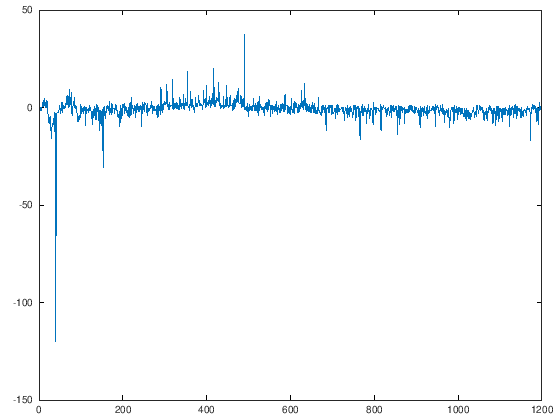

In [9]:
# x innovations
plot(2:idx-1, Nv(2:idx-1, 1))
disp('mean:'), disp(mean(Nv(:,1)));
disp('variance:'), disp(cov(Nv(:,1)));

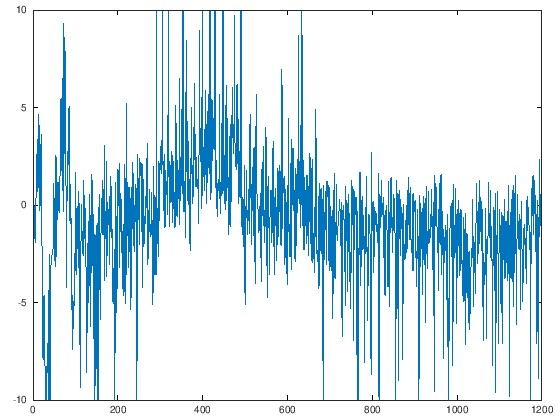

In [10]:
plot(2:idx-1, Nv(2:idx-1, 1))
ylim([-10 10])

mean:
-1.6950
variance:
 27.959


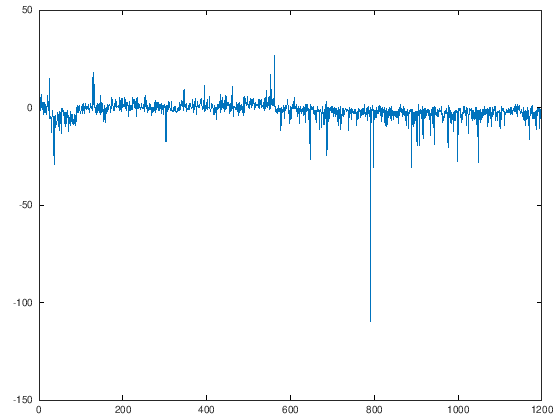

In [11]:
# y innovations
plot(2:idx-1, Nv(2:idx-1, 2))
disp('mean:'), disp(mean(Nv(:,2)));
disp('variance:'), disp(cov(Nv(:,2)));

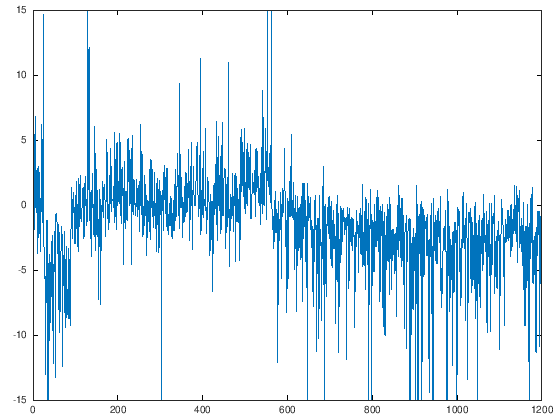

In [12]:
plot(2:idx-1, Nv(2:idx-1, 2))
ylim([-15 15])

## Final assessment

The filter responded very predictably as expected to target 1, where the innovations have 0 mean and variance of 1.

For target2, the innovations have shown anomalies with many spikes and their variances are high. The average mean of innovation is not close to zero at all.

For this assignment, I have used $Q=0$ throughout because the assumption was that the target should be traveling at a constant velocity.
If that was true, there should not be a Q necessary to cover for any non-linearity, as there should be none in the system.
Regarding the anomalies shown for target 2, I believe it is firstly due to the unbiased and conservative assumption has been broken; secondly
maybe the target was not traveling at a constant velocity or there was noise involved in the observations, and in any case, $Q=0$ would not be admissible to compensate for that non-linearity. I think that would explain why the filter has performed very poorly on target 2.